In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("apac_linfoma_unificado_unicas.csv", sep = ",", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 65 columns):
Unnamed: 0         30612 non-null int64
X1                 30612 non-null int64
X                  30612 non-null int64
AP_MVM             30612 non-null int64
AP_CONDIC          30612 non-null object
AP_GESTAO          30612 non-null int64
AP_CODUNI          30612 non-null int64
AP_AUTORIZ         30612 non-null int64
AP_CMP             30612 non-null int64
AP_PRIPAL          30612 non-null int64
AP_VL_AP           30612 non-null float64
AP_UFMUN           30612 non-null int64
AP_TPUPS           30612 non-null int64
AP_TIPPRE          30612 non-null int64
AP_CNPJCPF         30612 non-null int64
AP_CNPJMNT         30612 non-null int64
AP_CNSPCN          30612 non-null object
AP_COIDADE         30612 non-null int64
AP_NUIDADE         30612 non-null int64
AP_SEXO            30612 non-null object
AP_RACACOR         30612 non-null int64
AP_MUNPCN          30612 non-null int64
AP_UFN

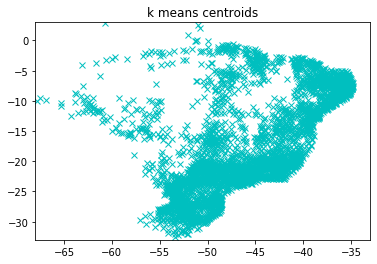

In [4]:
model = KMeans(n_clusters=45, random_state=0).fit(df.loc[:,['LO_P', 'LA_P']])
centers = np.array(model.cluster_centers_)

colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.plot()
plt.title('k means centroids')

coord = df.loc[:,['LO_P', 'LA_P']]
coord.drop_duplicates(inplace=True)

for i in range(len(coord)):
    plt.plot(coord.iloc[i,0], coord.iloc[i,1], color="c", marker="x",ls='None')
    plt.xlim([-68, -33])
    plt.ylim([-33, 3])

#plt.scatter(centers[:,0], centers[:,1], marker="s", color='r')
plt.show()

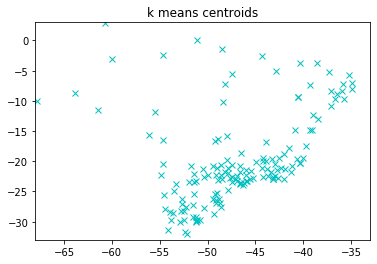

In [5]:
model = KMeans(n_clusters=45, random_state=0).fit(df.loc[:,['LO_H', 'LA_H']])
centers = np.array(model.cluster_centers_)

colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.plot()
plt.title('k means centroids')

coord = df.loc[:,['LO_H', 'LA_H']]
coord.drop_duplicates(inplace=True)

for i in range(len(coord)):
    plt.plot(coord.iloc[i,0], coord.iloc[i,1], color="c", marker="x",ls='None')
    plt.xlim([-68, -33])
    plt.ylim([-33, 3])

#plt.scatter(centers[:,0], centers[:,1], marker="s", color='r')
plt.show()

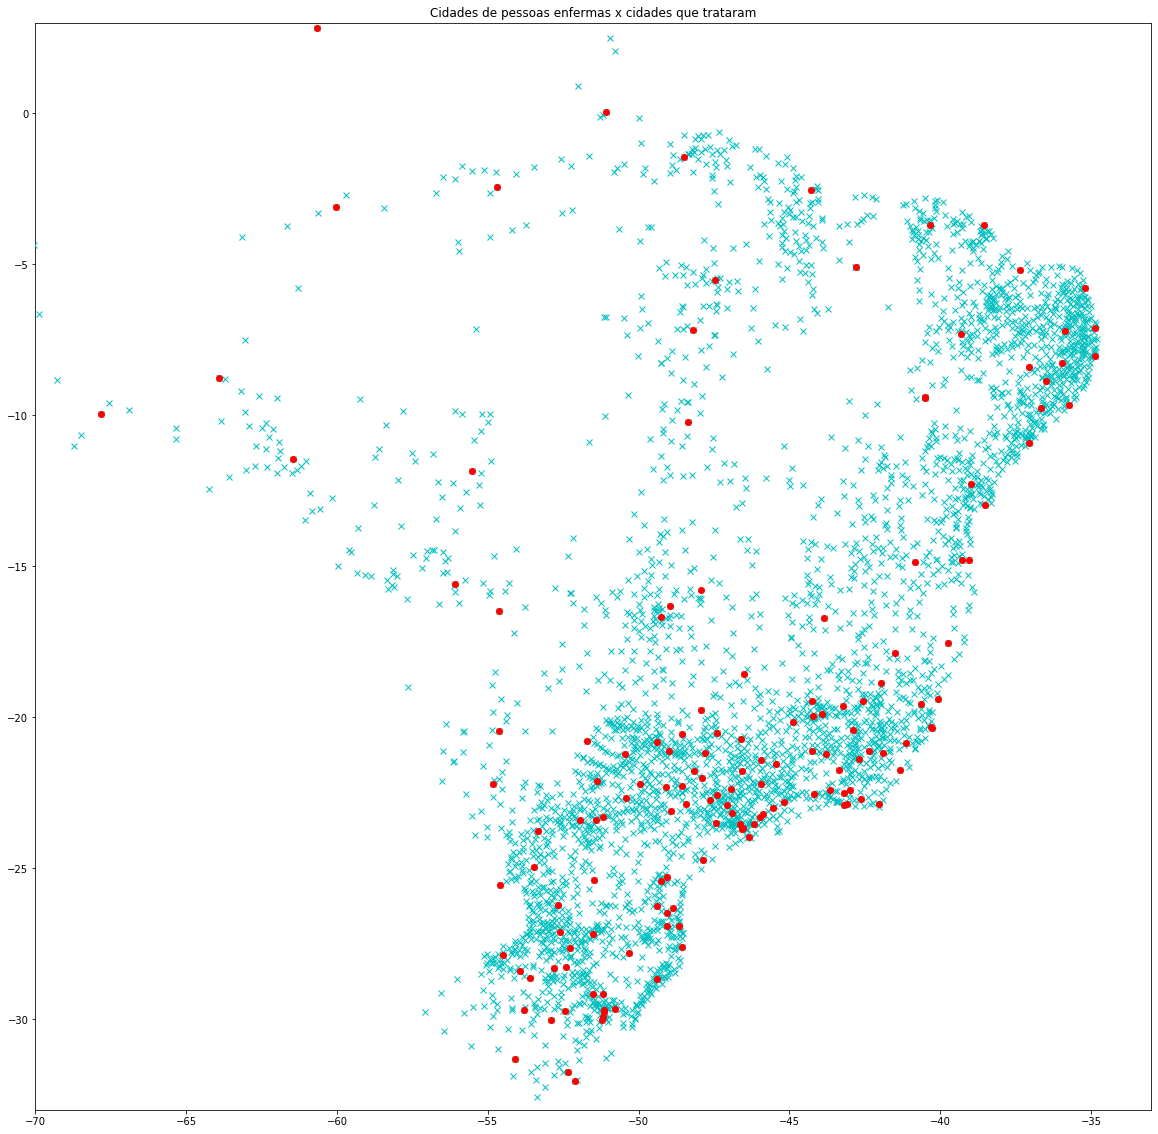

In [6]:
model = KMeans(n_clusters=151, random_state=0).fit(df.loc[:,['LO_H', 'LA_H']])
centers = np.array(model.cluster_centers_)

plt.figure(figsize=(20,20))
colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.plot()
plt.title('Cidades de pessoas enfermas x cidades que trataram')

coord = df.loc[:,['LO_P', 'LA_P']]
coord.drop_duplicates(inplace=True)

for i in range(len(coord)):
    plt.plot(coord.iloc[i,0], coord.iloc[i,1], color="c", marker="x",ls='None',zorder=5)
    plt.xlim([-70, -33])
    plt.ylim([-33, 3])

plt.scatter(centers[:,0], centers[:,1], marker="o", color='r',zorder=20)
plt.savefig('br.png', transparent=True)
plt.show()

In [7]:
rows = df[df.AP_ESTADI == 1]

rows.head()

#rows.loc[:,['LO_H', 'LA_H']]
#len(rows)

media = rows.loc[:,['AP_CODUNI','UF','LO_H','LA_H','AP_ESTADI']].groupby('AP_CODUNI').size().mean()

df1 = rows[rows.groupby(['AP_CODUNI'])['AP_CODUNI'].transform('count') > media*10]
df1.head()

,Unnamed: 0,X1,X,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,...,DISTANCIA,MIN_VAL,MAX_VAL,MEAN_VAL,NUM_APACS,MIN_DIST,MEAN_DIST,MAX_DIST,MEDIA_MES_ATEND,NRO_DIF_HOSP
1067,1068,74561,74561,201512,PG,431490,2237571,4315208300997,20151201,304060011,...,0.000000,324.0,1258.64,934.213333,3,0.000000,0.000000,0.000000,0.0,2
1079,1080,74289,74289,201510,PG,431490,2237571,4315206188535,20151001,304070017,...,12.915417,298.0,2970.00,1841.000000,6,12.915417,12.915417,12.915417,0.0,2
1089,1090,75789,75789,201611,PG,431490,2237571,4316208393805,20161101,304070017,...,12.915417,0.0,1700.00,619.857143,7,12.915417,12.915417,12.915417,0.0,2
1105,1106,75985,75985,201612,PG,431490,2237571,4316208499229,20161201,304070017,...,0.000000,0.0,2818.00,1374.000000,7,0.000000,13.398889,23.448057,0.0,2
1118,1119,76440,76440,201704,PG,431490,2237571,4317201122135,20170401,304070017,...,12.915417,0.0,1700.00,1367.900000,10,12.915417,12.915417,12.915417,0.0,2


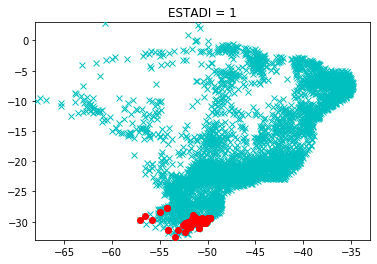

In [8]:
#estadi = 1
coord = df.loc[:,['LO_P', 'LA_P']]
coord.drop_duplicates(inplace=True)

colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.plot()
plt.title('ESTADI = 1')

for i in range(len(coord)):
    plt.plot(coord.iloc[i,0], coord.iloc[i,1], color="c", marker="x",ls='None',zorder=5)
    plt.xlim([-68, -33])
    plt.ylim([-33, 3])

plt.scatter(df1.loc[:,'LO_P'], df1.loc[:,'LA_P'], marker="o", color='r',zorder=20)
plt.show()

In [9]:
rows = df[df.AP_ESTADI == 2]

rows.head()

#rows.loc[:,['LO_H', 'LA_H']]
#len(rows)

media = rows.loc[:,['AP_CODUNI','UF','LO_H','LA_H','AP_ESTADI']].groupby('AP_CODUNI').size().mean()

df1 = rows[rows.groupby(['AP_CODUNI'])['AP_CODUNI'].transform('count') > media*10]
df1.head()

,Unnamed: 0,X1,X,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,...,DISTANCIA,MIN_VAL,MAX_VAL,MEAN_VAL,NUM_APACS,MIN_DIST,MEAN_DIST,MAX_DIST,MEDIA_MES_ATEND,NRO_DIF_HOSP
6871,6872,64327,64327,201401,MN,330455,2273454,3314200646713,20140101,304070017,...,17.000959,0.00,1700.00,1487.500000,8,17.000959,17.000959,17.000959,0.125000,1
6880,6881,64339,64339,201402,MN,330455,2273454,3314200716706,20140201,304060011,...,0.000000,1258.64,1258.64,1258.640000,6,0.000000,0.000000,0.000000,0.000000,1
6884,6885,64345,64345,201402,MN,330455,2273454,3314200701449,20140101,304060011,...,0.000000,0.00,1258.64,1048.866667,12,0.000000,0.000000,0.000000,0.166667,1
6885,6886,64347,64347,201402,MN,330455,2273454,3314200667074,20140101,304070017,...,227.870848,0.00,1700.00,1133.333333,3,227.870848,227.870848,227.870848,0.333333,1
6886,6887,64348,64348,201402,MN,330455,2273454,3314200716409,20140101,304060011,...,38.655763,0.00,1258.64,839.093333,3,38.655763,38.655763,38.655763,0.333333,1


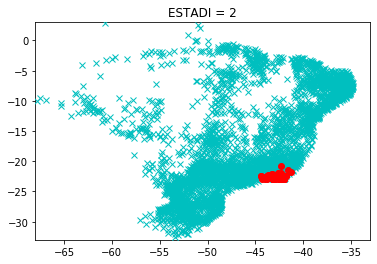

In [10]:
#estadi = 2
coord = df.loc[:,['LO_P', 'LA_P']]
coord.drop_duplicates(inplace=True)

colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.plot()
plt.title('ESTADI = 2')

for i in range(len(coord)):
    plt.plot(coord.iloc[i,0], coord.iloc[i,1], color="c", marker="x",ls='None',zorder=5)
    plt.xlim([-68, -33])
    plt.ylim([-33, 3])

plt.scatter(df1.loc[:,'LO_P'], df1.loc[:,'LA_P'], marker="o", color='r',zorder=20)
plt.show()

In [11]:
rows = df[df.AP_ESTADI == 3]

rows.head()

#rows.loc[:,['LO_H', 'LA_H']]
#len(rows)

media = rows.loc[:,['AP_CODUNI','UF','LO_H','LA_H','AP_ESTADI']].groupby('AP_CODUNI').size().mean()

df1 = rows[rows.groupby(['AP_CODUNI'])['AP_CODUNI'].transform('count') > media*10]
df1.head()

,Unnamed: 0,X1,X,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,...,DISTANCIA,MIN_VAL,MAX_VAL,MEAN_VAL,NUM_APACS,MIN_DIST,MEAN_DIST,MAX_DIST,MEDIA_MES_ATEND,NRO_DIF_HOSP
67,68,503,503,201607,PG,292740,3786,2916204355207,20160701,304010286,...,307.505553,30.0,2400.00,1215.000000,2,307.505553,307.505553,307.505553,0.000000,1
68,69,505,505,201608,PG,292740,3786,2916204394510,20160701,304010294,...,0.000000,358.0,1258.64,1084.426667,9,0.000000,0.000000,0.000000,0.222222,1
70,71,24400,24400,201607,PG,292740,3786,2916204374589,20160701,304070017,...,363.001654,0.0,2480.00,485.375000,8,363.001654,363.001654,363.001654,0.000000,1
72,73,24360,24360,201607,PG,292740,3786,2916204367110,20160701,304060011,...,0.000000,0.0,1478.00,753.242353,17,0.000000,0.000000,0.000000,0.117647,1
76,77,539,539,201612,PG,292740,3786,2916207879673,20161201,304010294,...,112.796500,358.0,1430.00,1141.056000,5,112.796500,112.796500,112.796500,0.200000,1


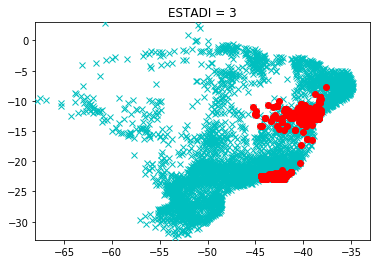

In [12]:
#estadi = 3
coord = df.loc[:,['LO_P', 'LA_P']]
coord.drop_duplicates(inplace=True)

colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.plot()
plt.title('ESTADI = 3')

for i in range(len(coord)):
    plt.plot(coord.iloc[i,0], coord.iloc[i,1], color="c", marker="x",ls='None',zorder=5)
    plt.xlim([-68, -33])
    plt.ylim([-33, 3])

plt.scatter(df1.loc[:,'LO_P'], df1.loc[:,'LA_P'], marker="o", color='r',zorder=20)
plt.show()

In [13]:
rows = df[df.AP_ESTADI == 4]

rows.head()

#rows.loc[:,['LO_H', 'LA_H']]
#len(rows)

media = rows.loc[:,['AP_CODUNI','UF','LO_H','LA_H','AP_ESTADI']].groupby('AP_CODUNI').size().mean()

df1 = rows[rows.groupby(['AP_CODUNI'])['AP_CODUNI'].transform('count') > media*10]
df1.head()

,Unnamed: 0,X1,X,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,...,DISTANCIA,MIN_VAL,MAX_VAL,MEAN_VAL,NUM_APACS,MIN_DIST,MEAN_DIST,MAX_DIST,MEDIA_MES_ATEND,NRO_DIF_HOSP
1284,1285,7203,7203,201405,EP,350000,6123740,3514217760361,20140401,304010294,...,0.000000,1823.0,1823.0,1823.0,1,0.000000,0.000000,0.000000,1.0,1
1291,1292,7361,7361,201408,EP,350000,6123740,3514230879390,20140701,304010294,...,53.742056,1683.0,1683.0,1683.0,1,53.742056,53.742056,53.742056,1.0,1
1344,1345,8215,8215,201607,EP,350000,6123740,3516234588273,20160601,304010294,...,0.000000,1823.0,1823.0,1823.0,1,0.000000,0.000000,0.000000,1.0,1
1364,1365,8272,8272,201609,EP,350000,6123740,3516239212090,20160701,304010294,...,0.000000,380.0,1473.0,926.5,2,0.000000,0.000000,0.000000,1.5,1
1458,1459,8524,8524,201705,EP,350000,6123740,3517228864072,20170401,304010294,...,0.000000,205.0,1018.0,611.5,2,0.000000,0.000000,0.000000,0.5,1


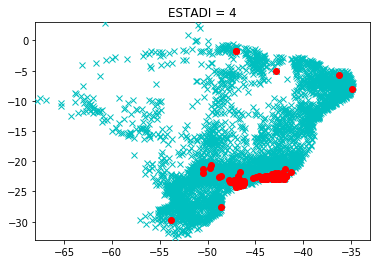

In [14]:
#estadi = 4
coord = df.loc[:,['LO_P', 'LA_P']]
coord.drop_duplicates(inplace=True)

colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']
plt.plot()
plt.title('ESTADI = 4')

for i in range(len(coord)):
    plt.plot(coord.iloc[i,0], coord.iloc[i,1], color="c", marker="x",ls='None',zorder=5)
    plt.xlim([-68, -33])
    plt.ylim([-33, 3])

plt.scatter(df1.loc[:,'LO_P'], df1.loc[:,'LA_P'], marker="o", color='r',zorder=20)
plt.show()

In [22]:
df_aux = df[df['AP_ESTADI'] != 0]

In [30]:
table_est = pd.crosstab(index=df_aux["UF"], columns=df_aux["AP_ESTADI"])
table_est

AP_ESTADI,1,2,3,4
UF,,,,
AC,0,6,39,16
AL,30,163,54,38
AM,21,31,68,35
AP,32,23,7,2
BA,123,281,647,492
CE,117,382,389,232
ES,132,92,245,155
GO,59,83,105,202
MA,87,195,75,64


In [35]:
for i in range(len(table_est)):
    table_est.iloc[i,:] = table_est.iloc[i,:]/np.mean(table_est.iloc[i,:])

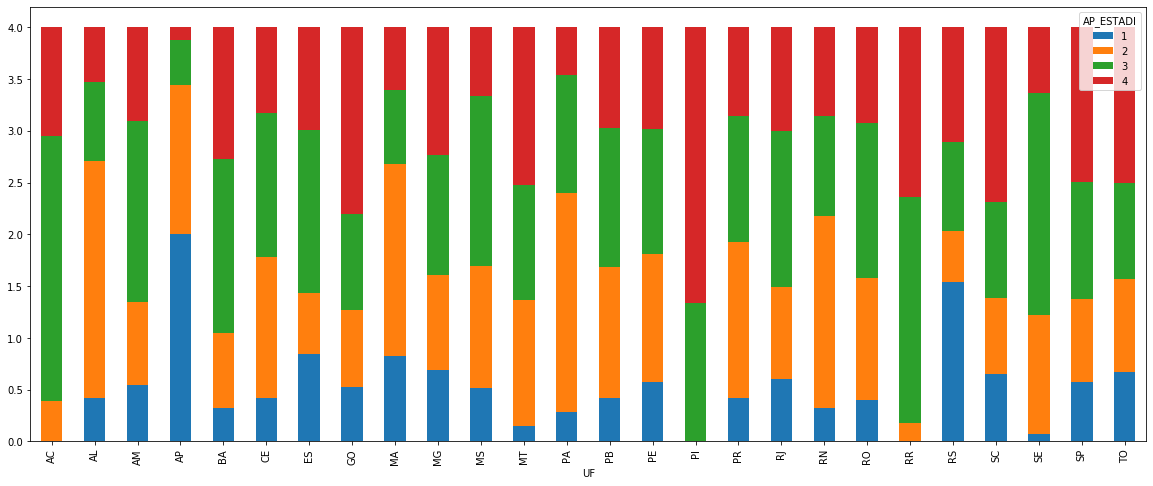

In [36]:
table_est.plot(kind="bar", figsize=(20,8),stacked=True)